In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
train_data = pd.read_csv("data/train.csv")
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [62]:
train_data = train_data.replace({"female": 0, "male": 1})

def extract_letters_and_digits(string):
    digits = "0"
    letters = ""
    for letter in string:
        if letter.isdigit():
            digits += letter
            continue
        letters += letter
    return letters, int(digits)


cabin_letters = []
cabin_numbers = []
for i, cabin in enumerate(train_data["Cabin"]):
    if pd.isnull(cabin):
        cabin_letter = ""
        cabin_number = 0
    else:
        cabin_letter, cabin_number = extract_letters_and_digits(cabin)
    cabin_letters.append(cabin_letter)
    cabin_numbers.append(cabin_number)
train_data["CabinNumber"] = cabin_numbers
train_data["CabinLetter"] = cabin_letters
train_data["HasCabin"] = (train_data["CabinNumber"] != 0).astype(int)

print("Unique cabin letters: {}".format(train_data["CabinLetter"].unique()))
print("Values of 'Embarked': {}".format(train_data["Embarked"].unique()))
print()
print(train_data.head())

Unique cabin letters: ['' 'C' 'E' 'G' 'D' 'A' 'C C C' 'B' 'F' 'F G' 'D D' 'B B' 'F E' 'C C'
 'B B B B' 'T' 'B B B']
Values of 'Embarked': ['S' 'C' 'Q' nan]

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  CabinNumber CabinLetter  HasCabin  
0         A/5 21171   7.2500   NaN        S            0  

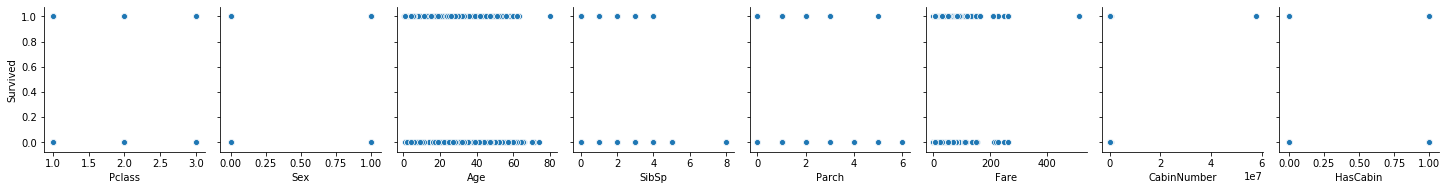

In [63]:
x_vars = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "CabinNumber", "HasCabin"]
sns.pairplot(train_data, x_vars=x_vars, y_vars=["Survived"])

In [64]:
# Correlation
for x in x_vars:
    print("{}: {:.3f}".format(x, train_data[["Survived", x]].corr().iloc[0,1]))

Pclass: -0.338
Sex: -0.543
Age: -0.077
SibSp: -0.035
Parch: 0.082
Fare: 0.257
CabinNumber: 0.060
HasCabin: 0.317


* Pclass, age & sibsp negatively correlated with survival
* Being male negatively correlated with survival
* Fare & HasCabin (presumably describe similar phenomenon) positively correlated with survival